# 3.6.2


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets, linear_model

In [2]:
boston = datasets.load_boston()

lm = linear_model.LinearRegression()
X_train = boston.data[:, np.newaxis, 12]
X_test = boston.data[:, np.newaxis, 12]

y_train = boston.target
y_test = boston.target

In [3]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [4]:
# The coefficients
print('Coefficients: \n', lm.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X_test, y_test))

Coefficients: 
 [-0.95004935]
Mean squared error: 38.48
Variance score: 0.54


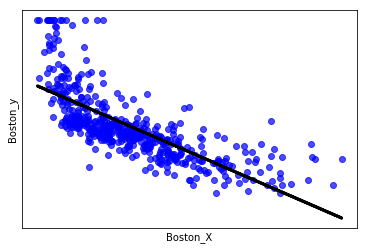

In [5]:
plt.scatter(X_test, y_test, color='blue', alpha = 0.7)
plt.plot(X_test, lm.predict(X_test), color='black', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("Boston_X")
plt.ylabel("Boston_y")

plt.show()

# Creating a better plot:

In [6]:
# Code from Cecilie Moriat:
plot_aspect = 1
plot_height = 10.0
plot_width = int(plot_height*plot_aspect)
cbar_max = 39
cbar_min = 0
cbar_step = 1.0
def lin_reg_plot(x_data, y_data, pred, x_label, y_label, title):
    # Plot setup
    fig, ax = plt.subplots(figsize=(plot_height,plot_width))
    im = ax.scatter(x_data, y_data, alpha = 0.7, cmap = plt.cm.tab10)
    im = ax.plot(x_data, pred, color = 'black')

    # Axis
    # Limites & ticks
    plt.xlim([-2,math.ceil(x_data.max())+5])
    plt.ylim([-2,math.ceil(y_data.max())+5])
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end+1, 5))
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end+1, 5))
    # Set the x-spine
    ax.spines['left'].set_position('zero')
    # Turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()
    # Set the y-spine
    ax.spines['bottom'].set_position('zero')
    # Turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

    # R² and titles/labels
    #r2 = r'$R^2$: '+'{0:.4f}'.format(linregr.score(x_data, y_data))
    plt.xlabel('{0}'.format(x_label))
    plt.ylabel('{0}'.format(y_label))
    plt.title('{0}'.format(title))
    #plt.text(1, 1, r2, ha='center', va='center',transform=ax.transAxes)
    #plt.savefig('{0}.jpg'.format(title))
    plt.show

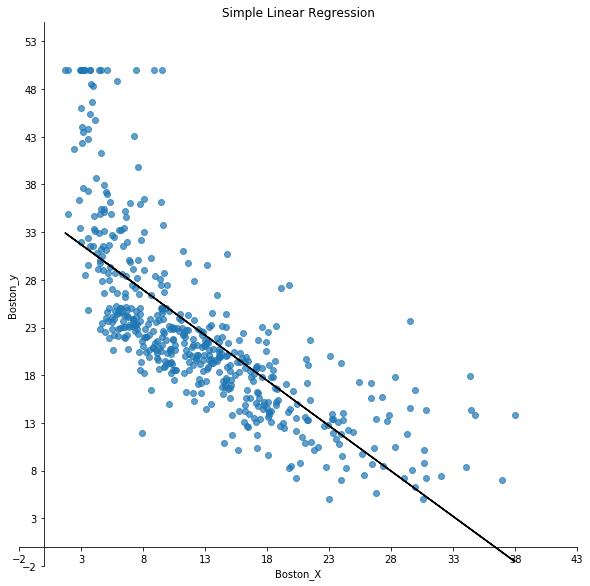

In [7]:
# Train using training datasets
lm.fit(X_train,y_train)

# Predictions
y_pred = lm.predict(X_test)


lin_reg_plot(X_train, y_train, y_pred, 'Boston_X', 'Boston_y', 'Simple Linear Regression')